# **Reddit (MFTC) pre-processing**
### **PERFECT: Prompt-free and Efficient Few-shot Learning with Language Models**


**PERFECT** is an approach to few-shot learning that doesn't require manual prompts or task-specific instructions. Instead, it uses the power of large pre-trained language models such as GPT-3 to learn new tasks from just a few examples. So PERFECT works by fine-tuning a **pre-trained language model** on a **small amount of labeled data** from a new task. The key innovation is to use a meta-learning algorithm that optimizes the fine-tuning process across multiple tasks, allowing the model to quickly adapt to new tasks with minimal training data.



The algorithm works by first **encoding a support set of examples into a representation that can be fed into the language model**. This representation is then used to generate a set of **synthetic examples** by conditioning the language model on a few-shot learning task description. The synthetic examples are used along with the support set to train a classifier.
During testing, the algorithm generates a set of synthetic examples for the test query, and these synthetic examples are used to make predictions. This approach has several advantages over traditional few-shot learning approaches. First, it is prompt-free, meaning that it does not require explicit instructions or prompts to be provided to the model. Second, it is highly efficient, as it leverages the pre-trained language model's ability to quickly generate synthetic examples.

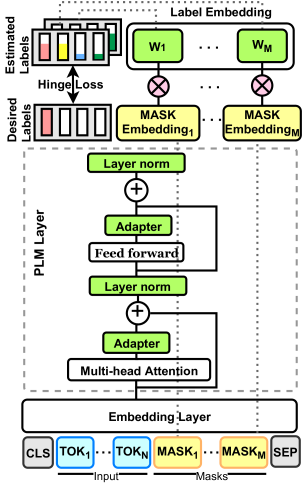

## **Reproduction result PERFECT with Reddit dataset**

In the following the results are reproduced with the Reddit dataset MFRC.

In [1]:
import sys
if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

# Load dataset (Reddit)

For now, we will only load the reddit dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset (path is relative from .ipynb location)
data = pd.read_csv('MFRC.csv', engine='python')

# Show the first couple of rows...
print(data[:4])
print(len(data))

                                                text subreddit  \
0  That particular part of the debate is especial...    europe   
1  That particular part of the debate is especial...    europe   
2  That particular part of the debate is especial...    europe   
3  /r/france is pretty lively, with it's own ling...    europe   

            bucket    annotator     annotation confidence  
0  French politics  annotator03      Non-Moral  Confident  
1  French politics  annotator01         Purity  Confident  
2  French politics  annotator02  Thin Morality  Confident  
3  French politics  annotator03      Non-Moral  Confident  
61226


# Analyze data

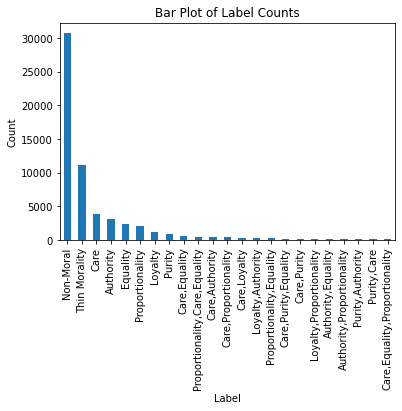

In [9]:
# Purge low-occurence labels
label_counts = data['annotation'].value_counts()
mask = data['annotation'].isin(label_counts[label_counts >= 100].index)

# show bar plot
label_counts = data[mask]['annotation'].value_counts()
label_counts.plot(kind='bar')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Bar Plot of Label Counts')
plt.show()

# Preprocess CSV datasets

The CSV contains a lot of information, such as annotator, confidence, subreddit, etc.. We are merely interested in pure classification. As such, the cell below will copy the CSV and condense it to just a `text-label` pair. The other information is not relevant in our research. We choose `N = 5` labels based on their occurence.

In [13]:
# Add row of single-label
data = data[['text', 'annotation']]

# Purge low-occurence labels
label_counts = data['annotation'].value_counts()

N_min = 2300
mask = data['annotation'].isin(label_counts[label_counts >= N_min].index)
data_reduced = data[mask]

# Create a mapping from label (Purity, Equality, Non-Moral,Care, etc.) to label
annotations = data_reduced['annotation'].unique()
mapping = {value:idx for idx, value in enumerate(annotations)}
inverse_mapping = {idx:value for idx, value in enumerate(annotations)}

# Map string labels to integer label
data_reduced.loc[:, 'label'] = data_reduced['annotation'].map(mapping)
data_reduced = data_reduced[['label', 'text']]

/tmp/ipykernel_15024/998878660.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced.loc[:, 'label'] = data_reduced['annotation'].map(mapping)


# Statistical analysis of class distribution

Amount of unique labels: 5
['Non-Moral' 'Thin Morality' 'Equality' 'Authority' 'Care']


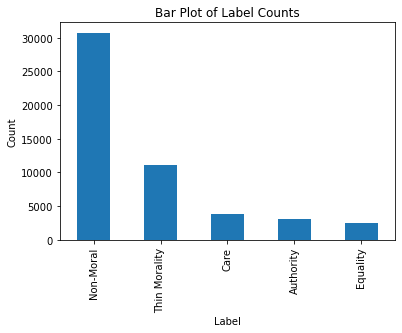

In [14]:
import matplotlib.pyplot as plt

print(f'Amount of unique labels: {len(annotations)}')
print(annotations)

bins = data_reduced['label'].value_counts()
bins.index = [inverse_mapping[idx] for idx in bins.index]
bins.plot(kind='bar')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Bar Plot of Label Counts')
plt.show()

# Create train/test data from datasets

In [ ]:
# Split dataset into train and test sets
train_data, test_data = train_test_split(data_reduced, test_size=0.2, random_state=42)

# Save train and test sets as separate CSV files
train_data.to_csv("train_mftc.csv", index=False, header=False)
test_data.to_csv("test_mftc.csv", index=False, header=False)

# Print information about train and test data
print(f'Training data contains {len(train_data)} samples. A few examples: \n')
print(train_data[:4])
print(3*'\n')
print(f'Test data contains {len(test_data)} samples. A few examples: \n')
print(test_data[:4])